In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('titanic.csv')


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Missing Data

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

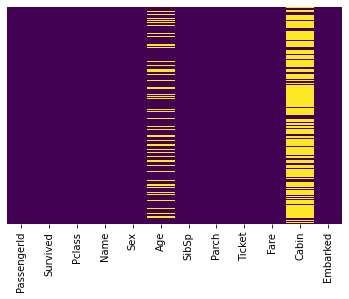

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

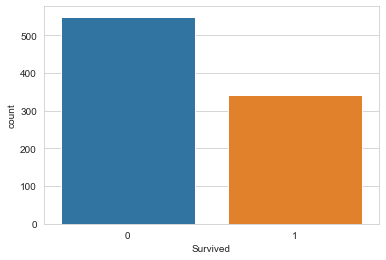

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

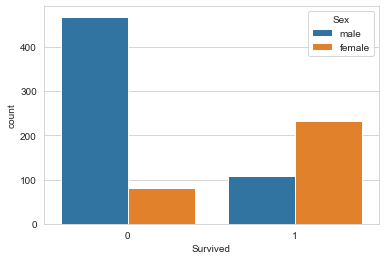

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

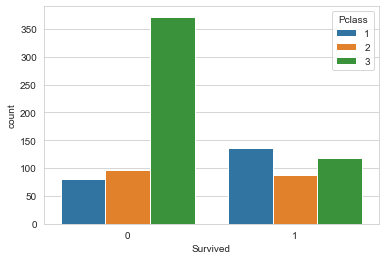

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

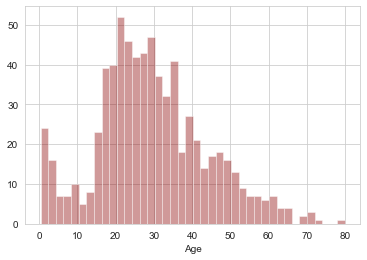

In [10]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

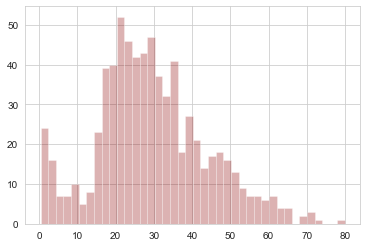

In [11]:
df['Age'].hist(bins=40,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

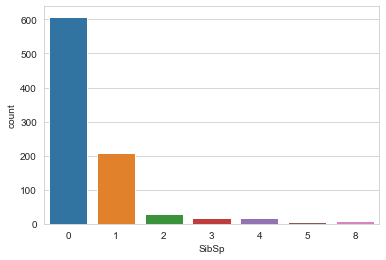

In [12]:
sns.countplot(x='SibSp',data=df)
#SibSp is the sibling or spouce max people don't have either sibling or spouce

<AxesSubplot:>

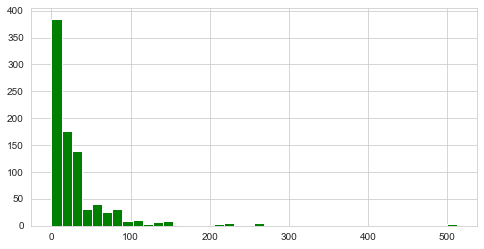

In [13]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

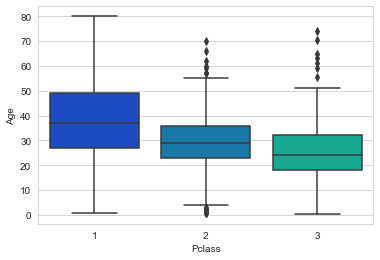

In [14]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [15]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24       

In [16]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [17]:
df['Age'].isnull().sum()

714

In [18]:
x=df['Age'].mean()


In [19]:
x

26.51412429378531

In [20]:
df['Age'].fillna(x,inplace=True)

In [22]:
df['Age'].isnull().sum()

0

<AxesSubplot:>

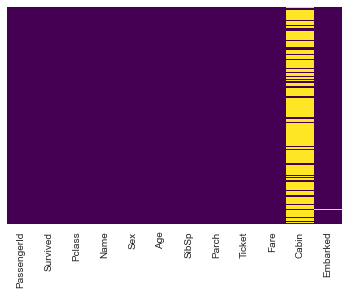

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
df=df.drop(['Cabin'],axis=1)


In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,26.514124,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,26.514124,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.514124,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,26.514124,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,26.514124,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,26.514124,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,26.514124,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.000000,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.514124,0,0,111369,30.0000,C


<AxesSubplot:>

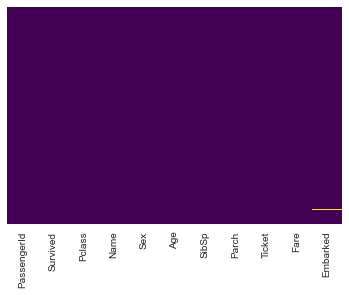

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
embarked=pd.get_dummies(df.Embarked,drop_first=True)


In [33]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [34]:
sex=pd.get_dummies(df.Sex,drop_first=True)

In [35]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [37]:
df=df.drop(['Ticket','Embarked','Sex','Name'],axis=1)


In [38]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,26.514124,1,0,7.2500
1,2,1,1,26.514124,1,0,71.2833
2,3,1,3,26.514124,0,0,7.9250
3,4,1,1,26.514124,1,0,53.1000
4,5,0,3,26.514124,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,26.514124,0,0,13.0000
887,888,1,1,26.514124,0,0,30.0000
888,889,0,3,24.000000,1,2,23.4500
889,890,1,1,26.514124,0,0,30.0000


In [39]:
df=pd.concat([df,sex,embarked],axis=1)


In [40]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,26.514124,1,0,7.2500,1,0,1
1,2,1,1,26.514124,1,0,71.2833,0,0,0
2,3,1,3,26.514124,0,0,7.9250,0,0,1
3,4,1,1,26.514124,1,0,53.1000,0,0,1
4,5,0,3,26.514124,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,26.514124,0,0,13.0000,1,0,1
887,888,1,1,26.514124,0,0,30.0000,0,0,1
888,889,0,3,24.000000,1,2,23.4500,0,0,1
889,890,1,1,26.514124,0,0,30.0000,1,0,0


# Building a Logistic Model

In [43]:
x=df.drop(['Survived'],axis=1)

In [44]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,26.514124,1,0,7.2500,1,0,1
1,2,1,26.514124,1,0,71.2833,0,0,0
2,3,3,26.514124,0,0,7.9250,0,0,1
3,4,1,26.514124,1,0,53.1000,0,0,1
4,5,3,26.514124,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,26.514124,0,0,13.0000,1,0,1
887,888,1,26.514124,0,0,30.0000,0,0,1
888,889,3,24.000000,1,2,23.4500,0,0,1
889,890,1,26.514124,0,0,30.0000,1,0,0


In [45]:
y=df['Survived']

In [46]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Building a Logistic Regression Model

# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [51]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
106,107,3,26.514124,0,0,7.6500,0,0,1
149,150,2,26.514124,0,0,13.0000,1,0,1
288,289,2,26.514124,0,0,13.0000,1,0,1
279,280,3,26.514124,1,1,20.2500,0,0,1
376,377,3,26.514124,0,0,7.2500,0,0,1
...,...,...,...,...,...,...,...,...,...
518,519,2,26.514124,1,0,26.0000,0,0,1
847,848,3,26.514124,0,0,7.8958,1,0,0
648,649,3,24.000000,0,0,7.5500,1,0,1
220,221,3,26.514124,0,0,8.0500,1,0,1


In [52]:
y_train

106    1
149    0
288    1
279    1
376    1
      ..
518    1
847    0
648    0
220    1
215    1
Name: Survived, Length: 712, dtype: int64

In [54]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
210,211,3,26.514124,0,0,7.0500,1,0,1
762,763,3,26.514124,0,0,7.2292,1,0,0
103,104,3,26.514124,0,0,8.6542,1,0,1
124,125,1,26.514124,0,1,77.2875,1,0,1
874,875,2,26.514124,1,0,24.0000,0,0,0
...,...,...,...,...,...,...,...,...,...
372,373,3,26.514124,0,0,8.0500,1,0,1
28,29,3,24.000000,0,0,7.8792,0,1,0
21,22,2,26.514124,0,0,13.0000,1,0,1
545,546,1,26.514124,0,0,26.0000,1,0,1


In [55]:
y_test

210    0
762    1
103    0
124    0
874    1
      ..
372    0
28     1
21     1
545    0
206    0
Name: Survived, Length: 179, dtype: int64

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
obj=LogisticRegression()


In [58]:
obj.fit(X_train,y_train)

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predictions=obj.predict(X_test)

In [64]:
obj.score(X_train,y_train)

0.7991573033707865

In [65]:
from sklearn.metrics import confusion_matrix

In [67]:
accuracy=confusion_matrix(y_test,predictions)


In [68]:
accuracy

array([[84, 20],
       [27, 48]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy=accuracy_score(y_test,predictions)

In [71]:
accuracy

0.7374301675977654

In [72]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)